In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Load data processed
communities = pd.read_csv('Results/Node_community.csv')
opinion = pd.read_csv('Results/Users_ideological_valence.csv')
msi = pd.read_csv('Results/MSI_users_score_with_1outletshared.csv')

In [3]:
# Concat all data
all_data = msi.merge(communities, left_on='usr_id', right_on='node', how='outer').merge(opinion, left_on='usr_id', right_on='usr_id', how = 'outer')
all_data = all_data[['usr_id', 'score_x', 'community', 'opinion_valence']].copy()
all_data.rename(columns={'score_x': 'msi'}, inplace=True)

In [4]:
# auxiliar lists
score_users = all_data['msi'].to_list()
print(np.mean(score_users))
print(np.median(score_users))

-5.654842457925291e-18
0.5637492751533378


### Communities sorted by size

In [5]:
index_sorted = all_data.groupby('community').count().sort_values('usr_id', ascending=False).index
all_data.groupby('community').count().sort_values('usr_id', ascending=False).head(n = 10)

,usr_id,msi,opinion_valence
community,,,
5.0,43031,43031,11436
2.0,41605,41605,12460
46.0,9482,9482,3019
61.0,3033,3033,266
24.0,1887,1887,155
0.0,1847,1847,489
60.0,1540,1540,127
55.0,1205,1205,292
7.0,925,925,226


In [6]:
# Summary
all_data.groupby('community').mean()[['msi', 'opinion_valence']].loc[index_sorted].head(n = 10)

,msi,opinion_valence
community,,
5.0,0.680421,0.710131
2.0,-0.870590,-0.845091
46.0,0.454212,0.230499
61.0,0.607625,0.337822
24.0,-1.076243,-0.749779
0.0,0.417646,-0.021142
60.0,-1.136546,-0.633469
55.0,0.421537,0.340766
7.0,0.045231,-0.667299


In [7]:
ncommunity = 2
score_users_com = all_data[all_data.community == ncommunity]['msi'].to_list()
iv_users_com = all_data[all_data.community == ncommunity].dropna(subset=['opinion_valence'])['opinion_valence'].to_list()

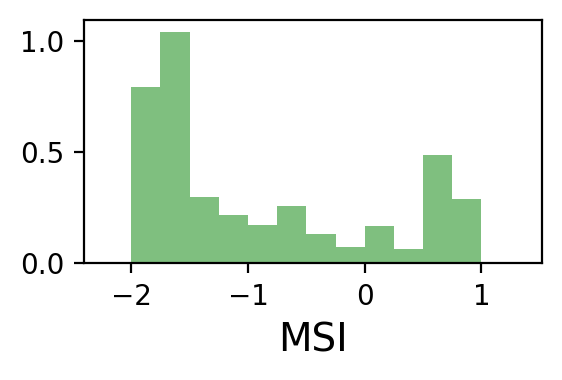

In [8]:
# Scores of the users
fig, ax = plt.subplots(dpi = 200, figsize=(3,2))
ax.hist(score_users_com, bins = np.arange(-2, 2, 0.25), alpha = 0.50, color = 'g', density = True)
ax.set_xlabel(r'MSI', size = 14)
ax.set_xlim(np.quantile(score_users, q = [0.005, 0.995]) + np.array([-0.65, 0.65]))
fig.tight_layout()
plt.show()

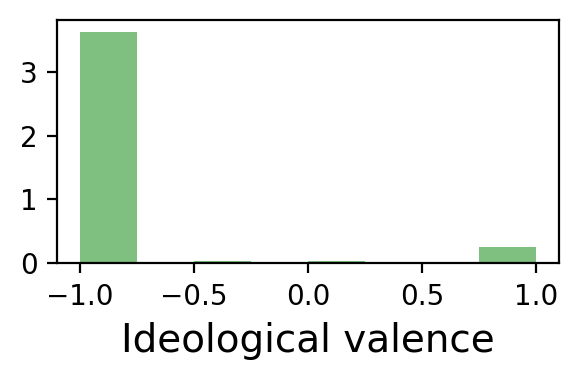

In [9]:
# IV of the users
fig, ax = plt.subplots(dpi = 200, figsize=(3,2))
ax.hist(iv_users_com, bins = np.arange(-1, 1.01, 0.25), alpha = 0.50, color = 'g', density = True)
ax.set_xlabel(r'Ideological valence', size = 14)
fig.tight_layout()
plt.show()

### Users with well defined ideology

In [22]:
# Work with users with well-defined community, opinion, media consumption
user_opinion_defined = all_data.dropna()
user_opinion_defined = user_opinion_defined[user_opinion_defined.opinion_valence != 0]

In [23]:
index_sorted = user_opinion_defined.groupby('community').count().sort_values('usr_id', ascending=False).index
user_opinion_defined.groupby('community').count().sort_values('usr_id', ascending=False)

,usr_id,msi,opinion_valence
community,,,
2.0,12331,12331,12331
5.0,11221,11221,11221
46.0,2908,2908,2908
0.0,475,475,475
55.0,279,279,279
...,...,...,...
177.0,1,1,1
176.0,1,1,1
174.0,1,1,1


In [24]:
user_opinion_defined.groupby('community').mean(numeric_only=True).loc[index_sorted][['msi', 'opinion_valence']]

,msi,opinion_valence
community,,
2.0,-0.883930,-0.853932
5.0,0.674774,0.723737
46.0,0.468552,0.239297
0.0,0.446406,-0.021765
55.0,0.396272,0.356644
...,...,...
177.0,0.563749,-1.000000
176.0,0.509369,-1.000000
174.0,0.822315,-1.000000


In [25]:
user_opinion_defined['ideology'] = user_opinion_defined['opinion_valence'].apply(lambda x: 'CR' if x > 0 else 'CL')
user_opinion_defined['media_ideology'] = user_opinion_defined['msi'].apply(lambda x: 'CR' if x > 0.00 else 'CL')

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score

ncommunity = 5

X = user_opinion_defined[user_opinion_defined.community == ncommunity][['ideology', 'media_ideology']].to_numpy()

[[0.00507976 0.12913288]
 [0.01586311 0.84992425]]


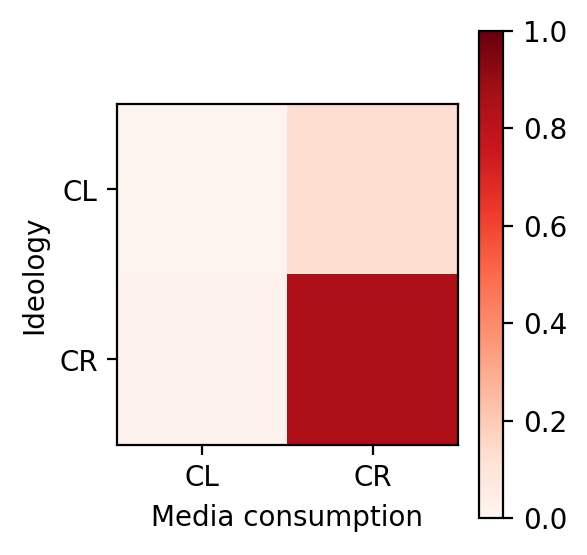

In [27]:
plt.figure(dpi = 200, figsize = (3,3))

cm = confusion_matrix(X[:,0], X[:,1])
cm_norm = cm / cm.sum()
print(cm_norm)

plt.imshow(cm_norm, cmap = 'Reds', vmin = 0.00, vmax = 1.00)

plt.ylabel('Ideology')
plt.xlabel('Media consumption')
plt.xticks([0, 1], ['CL', 'CR'])
plt.yticks([0, 1], ['CL', 'CR'])
plt.colorbar()
plt.tight_layout()
plt.show()

### Adjusted rand index 

What is more correlated with community label, the ideology or the media consumption?

In [47]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(aux.community, aux.ideology)

0.4049248756110366

In [48]:
adjusted_rand_score(aux.community, aux.media_ideology)

0.3069277630077964